# Advanced DataFrames Exercises

Create a notebook or python script named 4.8.4.4_advanced_dataframes to do your work in for this exercise.

For the following exercises, you'll need to load several datasets using the pydataset library. (If you get an error when trying to run the import below, use pip to install the pydataset package.)

from pydataset import data
When the instructions say to load a dataset, you can pass the name of the dataset as a string to the data function to load the dataset. You can also view the documentation for the data set by passing the show_doc keyword argument.

mpg = data('mpg') # load the dataset and store it in a variable
data('mpg', show_doc=True) # view the documentation for the dataset
Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from pydataset import data

## Load the mpg dataset.

In [3]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Read the documentation for it, and use the data to answer these questions:

In [4]:
df_info = pd.DataFrame(data())
df_info

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [5]:
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




## On average, which manufacturer has the best miles per gallon?

In [6]:
mpg['average_mpg'] = (mpg.hwy + mpg.cty) / 2

In [7]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [8]:
mpg.groupby('manufacturer').average_mpg.max()

manufacturer
audi          25.5
chevrolet     26.0
dodge         21.0
ford          22.0
honda         30.5
hyundai       26.0
jeep          19.5
land rover    15.0
lincoln       15.0
mercury       16.0
nissan        27.5
pontiac       23.0
subaru        23.5
toyota        32.5
volkswagen    39.5
Name: average_mpg, dtype: float64

In [170]:
mpg.groupby('manufacturer')['hwy', 'cty'].mean().sort_values(by='hwy')

,hwy,cty
manufacturer,,
land rover,16.500000,11.500000
lincoln,17.000000,11.333333
jeep,17.625000,13.500000
dodge,17.945946,13.135135
mercury,18.000000,13.250000
ford,19.360000,14.000000
chevrolet,21.894737,15.000000
nissan,24.615385,18.076923
toyota,24.911765,18.529412


## How many different manufacturers are there?

In [9]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [10]:
mpg['manufacturer'].unique()

array(['audi', 'chevrolet', 'dodge', 'ford', 'honda', 'hyundai', 'jeep',
       'land rover', 'lincoln', 'mercury', 'nissan', 'pontiac', 'subaru',
       'toyota', 'volkswagen'], dtype=object)

In [11]:
mpg['manufacturer'].nunique()

15

## How many different models are there?

In [12]:
mpg['model'].unique()

array(['a4', 'a4 quattro', 'a6 quattro', 'c1500 suburban 2wd', 'corvette',
       'k1500 tahoe 4wd', 'malibu', 'caravan 2wd', 'dakota pickup 4wd',
       'durango 4wd', 'ram 1500 pickup 4wd', 'expedition 2wd',
       'explorer 4wd', 'f150 pickup 4wd', 'mustang', 'civic', 'sonata',
       'tiburon', 'grand cherokee 4wd', 'range rover', 'navigator 2wd',
       'mountaineer 4wd', 'altima', 'maxima', 'pathfinder 4wd',
       'grand prix', 'forester awd', 'impreza awd', '4runner 4wd',
       'camry', 'camry solara', 'corolla', 'land cruiser wagon 4wd',
       'toyota tacoma 4wd', 'gti', 'jetta', 'new beetle', 'passat'],
      dtype=object)

In [13]:
mpg['model'].nunique()

38

## Do automatic or manual cars have better miles per gallon?

In [14]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mpg
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [15]:
mpg['trans'].str.contains('auto')

1       True
2      False
3      False
4       True
5       True
       ...  
230     True
231    False
232     True
233    False
234     True
Name: trans, Length: 234, dtype: bool

In [16]:
auto_transmission = mpg[mpg['trans'].str.contains('auto')]

In [17]:
manual_transmission = mpg[mpg['trans'].str.contains('manual')]

In [18]:
manual_trans_mpg_avg = manual_transmission['average_mpg'].agg(['mean']).astype(int)

In [19]:
manual_trans_mpg_avg[0]

22

In [20]:
auto_trans_mpg_avg = auto_transmission['average_mpg'].agg(['mean']).astype(int)

In [21]:
print(f"Manual vehicles have an avg mpg of {manual_trans_mpg_avg[0]}. Automatic transmission vehicles have an avg mpg of {auto_trans_mpg_avg[0]}. Manual cars have a better mpg")

Manual vehicles have an avg mpg of 22. Automatic transmission vehicles have an avg mpg of 19. Manual cars have a better mpg


In [172]:
mpg['transmission_type'] = mpg.trans.str[:-4]

In [175]:
mpg.groupby('transmission_type')['hwy', 'cty'].mean()

,hwy,cty
transmission_type,,
auto,22.292994,15.968153
manual,25.779221,18.675325


# Joining and Merging

Copy the users and roles dataframes from the examples above.

In [22]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [23]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


## What do you think a right join would look like?

In [24]:
# This is a left join
pd.merge(users, roles, left_on='role_id', right_on='id', how='left')

,id_x,name_x,role_id,id_y,name_y
0,1,bob,1.0,1.0,admin
1,2,joe,2.0,2.0,author
2,3,sally,3.0,3.0,reviewer
3,4,adam,3.0,3.0,reviewer
4,5,jane,NaN,NaN,NaN
5,6,mike,NaN,NaN,NaN


In [25]:
# This is a right join
pd.merge(users, roles, left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [26]:
# This is an outer join
pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [27]:
# This is what happens if you drop the foreign keys from the dataframes and try to merge them
pd.merge(users, roles, how='left')

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


# Getting data from SQL databases

## Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [142]:
from env import host, user, password

In [143]:
def get_db_url(username, hostname, password, db_name):
    return f"mysql+pymysql://{user}:{password}@{host}/{db_name}"

In [144]:
query = '''
    SELECT * 
    FROM employees
'''

In [145]:
url = get_db_url(user, host, password,'employees')

## Use your function to obtain a connection to the employees database.

In [146]:
employees = pd.read_sql(query, url)

# Once you have successfully run a query:
## Intentionally make a typo in the database url. What kind of error message do you see?

In [42]:
df = pd.read_sql("SELECT * FROM employees LIMIT 5", url)

In [43]:
df

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


## Intentionally make an error in your SQL query. What does the error message look like?

In [44]:
df = pd.read_sql("SELECT * FROM employee LIMIT 5", url)

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employee' doesn't exist")
[SQL: SELECT * FROM employee LIMIT 5]
(Background on this error at: http://sqlalche.me/e/f405)

## Read the employees and titles tables into two separate dataframes

In [147]:
employees = pd.read_sql("SELECT * FROM employees", url)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [148]:
titles = pd.read_sql("SELECT * FROM titles", url)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


## Visualize the number of employees with each title.

In [177]:
titles['title'].value_counts()

Engineer              115003
Staff                 107391
Senior Engineer        97750
Senior Staff           92853
Technique Leader       15159
Assistant Engineer     15128
Manager                   24
Name: title, dtype: int64

In [178]:
titles_as_strings = titles.to_date.astype('str')
current_emp = titles[titles_as_strings.str.contains('9999')]
current_emp['title'].value_counts()

Senior Engineer       85939
Senior Staff          82024
Engineer              30983
Staff                 25526
Technique Leader      12055
Assistant Engineer     3588
Manager                   9
Name: title, dtype: int64

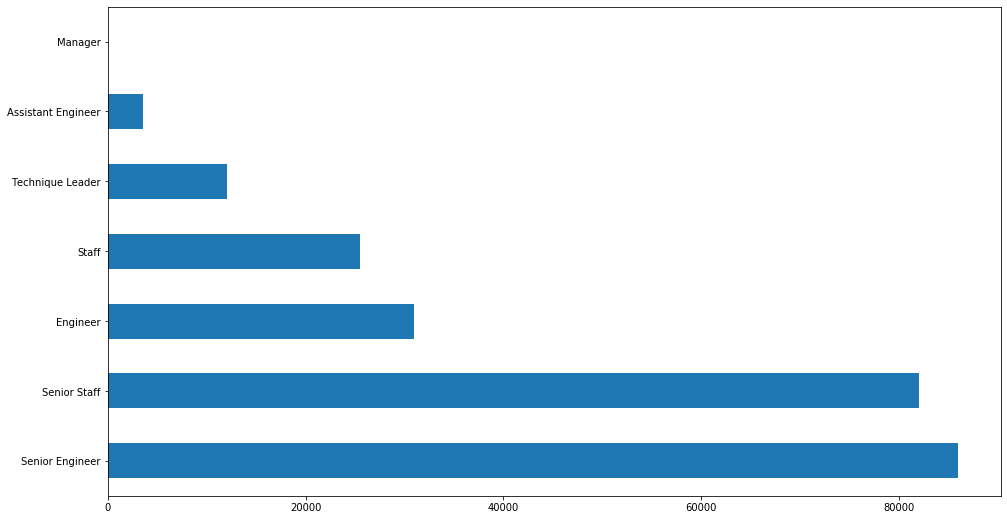

In [184]:
plt.figure(figsize=(16, 9))
current_emp['title'].value_counts().plot.barh()
plt.show()

## Join the employees and titles dataframes together.

In [187]:
emp_df = employees.set_index('emp_no').join(titles.set_index('emp_no'))
emp_df

,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
emp_no,,,,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...
499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


In [151]:
joined = employees.join(titles.set_index('emp_no'), on=('emp_no'))
joined

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [59]:
# Mask current employees
current_mask = joined['to_date'].apply(lambda x: '9999' not in str(x))
current_mask.head()

0    False
1    False
2    False
3     True
3    False
Name: to_date, dtype: bool

In [60]:
# Show only current employees
current_employees = joined[current_mask]
current_employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,Staff,1989-09-12,1996-09-12
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10,Staff,1989-02-10,1996-02-11
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15,Assistant Engineer,1998-03-11,2000-07-31
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18,Assistant Engineer,1985-02-18,1990-02-18


## Visualize how frequently employees change titles.

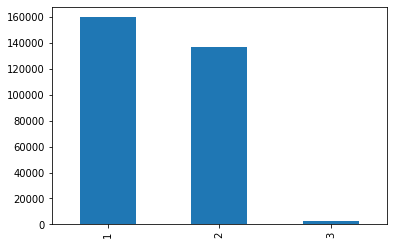

In [191]:
# Zach Version

titles.groupby('emp_no').title.count().value_counts().plot.bar() # How many jobs everyone has had within the company

In [200]:
# Other Zach Version

title_counts = titles.groupby('emp_no').title.count().value_counts()
title_counts

1    159754
2    137256
3      3014
Name: title, dtype: int64

In [199]:
df = titles[titles.emp_no.isin(title_counts[titles_counts > 1].index)]
df

,emp_no,title,from_date,to_date


In [201]:
# Create new column for changed frequency
joined['diff'] = joined.to_date - joined.from_date
joined

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date,diff
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01,"2926512 days, 0:00:00"
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01,"2922821 days, 0:00:00"
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01,"2923065 days, 0:00:00"
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01,"3287 days, 0:00:00"
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01,"2923067 days, 0:00:00"
...,...,...,...,...,...,...,...,...,...,...
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29,"1826 days, 0:00:00"
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01,"2924256 days, 0:00:00"
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01,"2921945 days, 0:00:00"
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27,"1826 days, 0:00:00"


In [202]:
current_mask = joined['to_date'].apply(lambda x: '9999' not in str(x))
current_mask.head()

0    False
1    False
2    False
3     True
3    False
Name: to_date, dtype: bool

In [203]:
current = joined[current_mask]

Text(0, 0.5, 'Total # of Employees')

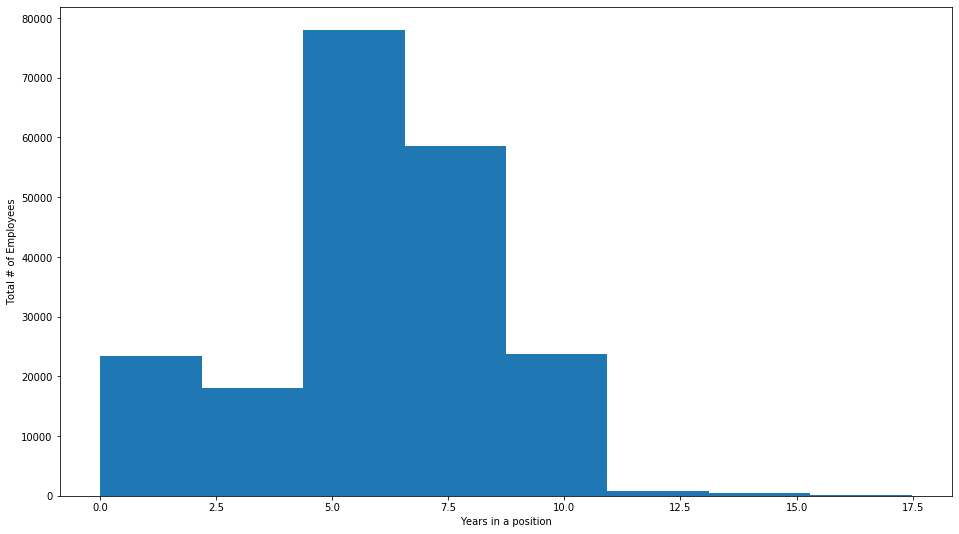

In [204]:
plt.figure(figsize=(16, 9))
plt.hist(current['diff'].apply(lambda x: x.days/365), bins=8)
plt.xlabel("Years in a position")
plt.ylabel("Total # of Employees")

## For each title, find the hire date of the employee that was hired most recently with that title.

In [65]:
joined.groupby('title')['hire_date'].max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

## Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [158]:
query='''
    SELECT *
    FROM titles
    JOIN dept_emp
    USING(emp_no)
    JOIN departments
    on dept_emp.dept_no = departments.dept_no;
    
'''

In [159]:
titles_dept = pd.read_sql(query, url)
titles_dept

,emp_no,title,from_date,to_date,dept_no,from_date,to_date,dept_no,dept_name
0,10011,Staff,1990-01-22,1996-11-09,d009,1990-01-22,1996-11-09,d009,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,d009,1989-09-20,9999-01-01,d009,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,d009,1989-09-20,9999-01-01,d009,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,d009,1992-05-04,9999-01-01,d009,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,d009,1992-05-04,9999-01-01,d009,Customer Service
...,...,...,...,...,...,...,...,...,...
489898,499986,Senior Staff,1992-08-11,9999-01-01,d007,1985-08-11,9999-01-01,d007,Sales
489899,499986,Staff,1985-08-11,1992-08-11,d007,1985-08-11,9999-01-01,d007,Sales
489900,499987,Staff,1999-12-21,9999-01-01,d007,1999-12-21,9999-01-01,d007,Sales
489901,499988,Senior Staff,1997-07-25,2001-10-09,d007,1988-07-25,2001-10-09,d007,Sales


In [167]:
titles_dept.groupby('dept_name')['title'].unique().apply(len)

dept_name
Customer Service      7
Development           7
Finance               3
Human Resources       3
Marketing             3
Production            7
Quality Management    5
Research              7
Sales                 3
Name: title, dtype: int64

In [162]:
pd.crosstab(titles_dept.dept_name, titles_dept.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


# Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

In [76]:
query='SELECT * FROM orders'

In [77]:
url = get_db_url(user, host, password,'chipotle')

In [79]:
chipotle_data = pd.read_sql(query, url)

In [91]:
chipotle_data.head(20)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
5,6,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sour Cream, Guacamole, Lettuce]]",$10.98
6,7,3,1,Side of Chips,nan,$1.69
7,8,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables, Black Beans, Pinto Beans, Cheese, Sour...",$11.75
8,9,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25
9,10,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto Beans, Cheese, Sour Cream, Lettuce]]",$9.25


## What is the total price for each order?

In [98]:
chipotle_data['price'] = chipotle_data['item_price'].apply(lambda x: float(x[1:]))
chipotle_data.head()

,id,order_id,quantity,item_name,choice_description,item_price,price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39,2.39
1,2,1,1,Izze,[Clementine],$3.39,3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39,2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98,16.98


In [99]:
chipotle_data.groupby('order_id').price.sum()

order_id
1       11.56
2       16.98
3       12.67
4       21.00
5       13.70
        ...  
1830    23.00
1831    12.90
1832    13.20
1833    23.50
1834    28.75
Name: price, Length: 1834, dtype: float64

## What are the most popular 3 items?

In [208]:
most_popular = chipotle_data.groupby('item_name')['item_price'].count().nlargest(3)

In [209]:
most_popular = pd.DataFrame(most_popular)

In [210]:
most_popular

,item_price
item_name,
Chicken Bowl,726
Chicken Burrito,553
Chips and Guacamole,479


## Which item has produced the most revenue?

In [123]:
chipotle_data.groupby('item_name').price.sum().sort_values(ascending=False).index[0]

'Chicken Bowl'